In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/ryansponzilli/Developer/HealthDataAnalysis/StudyTime/StudyTimeSp24.csv")
df

,Date,GEOL 107,ASTR 210,MATH 257,STAT 207,Anth 103,Total Study Time (min)
0,1/16/24,0,0,0,0,NaN,0
1,1/17/24,0,0,90,0,NaN,90
2,1/18/24,0,45,0,0,NaN,45
3,1/19/24,0,0,0,0,NaN,0
4,1/20/24,0,120,0,0,NaN,120
...,...,...,...,...,...,...,...
75,3/31/24,0,0,0,0,0.0,0
76,4/1/24,0,200,60,0,0.0,260
77,4/2/24,75,130,0,105,0.0,310
78,4/3/24,0,0,90,60,70.0,220


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day of Week"] = df["Date"].apply(lambda x: x.strftime("%A"))
df.mean(numeric_only=True) * 7

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_12339/1687826316.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


GEOL 107                   71.750000
ASTR 210                  301.437500
MATH 257                  199.062500
STAT 207                  164.500000
Anth 103                  224.736842
Total Study Time (min)    790.125000
dtype: float64

**I typically spend**
* 1hr 15min on Geology per week,
* 5hr 23min on Astronomy per week,
* 3hr 40min on Lin Alg per week,
* 2hr 50min on Stat per week

**For a total of 13hr 9min of studying outside of class per week**

In [4]:
df2 = pd.read_csv("/Users/ryansponzilli/Developer/HealthDataAnalysis/StudyTime/StudyTimeFa23.csv")
df2["Date"] = pd.to_datetime(df2["Date"])
df2

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_12339/2761905135.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["Date"] = pd.to_datetime(df2["Date"])


,Date,PHYS 214,PHYS 213,STAT 107,MATH 241,LAS 101,HIST 164,Total Study Time (min)
0,2023-09-18,0.0,NaN,0,60,0.0,NaN,60
1,2023-09-19,15.0,NaN,0,0,0.0,NaN,15
2,2023-09-20,0.0,NaN,60,90,0.0,NaN,150
3,2023-09-21,30.0,NaN,0,150,15.0,NaN,195
4,2023-09-22,60.0,NaN,0,0,0.0,NaN,60
...,...,...,...,...,...,...,...,...
78,2023-12-12,NaN,0.0,0,0,NaN,0.0,0
79,2023-12-13,NaN,0.0,0,0,NaN,210.0,210
80,2023-12-14,NaN,0.0,0,0,NaN,120.0,120
81,2023-12-15,NaN,0.0,0,0,NaN,0.0,0


In [5]:
df2["PHYS"] = df2["PHYS 213"].fillna(0) + df2["PHYS 214"].fillna(0)
df2.mean(numeric_only=True) * 7

PHYS 214                  189.000000
PHYS 213                  154.444444
STAT 107                   64.518072
MATH 241                  226.867470
LAS 101                     7.777778
HIST 164                  351.875000
Total Study Time (min)    694.096386
PHYS                      162.771084
dtype: float64

In [6]:
df["Week"] = df["Date"].dt.to_period("W").dt.to_timestamp()
df_week = df.groupby("Week").sum(numeric_only=True)

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_12339/2455755950.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Week", y="Total Study Time (min)",data=df,ci=False)


<Axes: xlabel='Week', ylabel='Total Study Time (min)'>

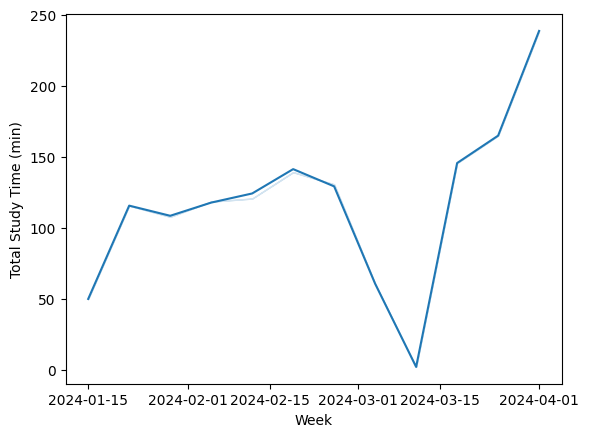

In [7]:
sns.lineplot(x="Week", y="Total Study Time (min)",data=df,ci=False)